In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data = '/kaggle/input/iris/Iris.csv'
df = pd.read_csv(data, header=0)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv
/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [4]:
display(df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.describe()
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [7]:
x=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y=df['Species'].values

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

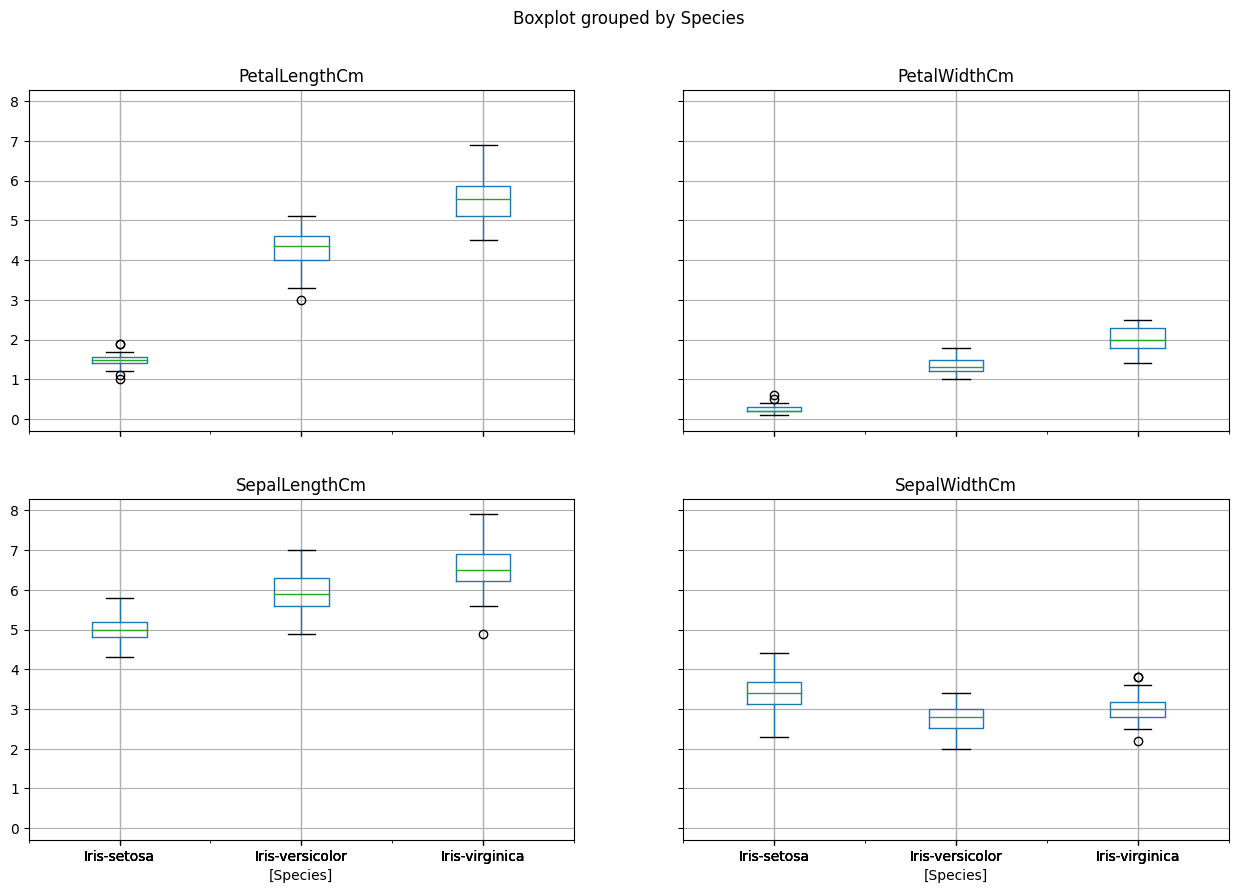

In [23]:
plt.figure()
df.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [26]:
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [29]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [33]:
k_list = list(range(1,50,2))
cv_scores = []
# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [34]:
cv_scores

[0.95,
 0.925,
 0.9333333333333333,
 0.95,
 0.9583333333333333,
 0.9583333333333333,
 0.95,
 0.95,
 0.95,
 0.9416666666666667,
 0.9416666666666667,
 0.95,
 0.9416666666666667,
 0.925,
 0.9333333333333333,
 0.9416666666666668,
 0.9416666666666668,
 0.9416666666666668,
 0.925,
 0.9333333333333332,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9333333333333332,
 0.9333333333333332]

[0.050000000000000044, 0.07499999999999996, 0.06666666666666665, 0.050000000000000044, 0.04166666666666674, 0.04166666666666674, 0.050000000000000044, 0.050000000000000044, 0.050000000000000044, 0.05833333333333335, 0.05833333333333335, 0.050000000000000044, 0.05833333333333335, 0.07499999999999996, 0.06666666666666665, 0.05833333333333324, 0.05833333333333324, 0.05833333333333324, 0.07499999999999996, 0.06666666666666676, 0.05833333333333335, 0.05833333333333335, 0.05833333333333335, 0.06666666666666676, 0.06666666666666676]


<Figure size 640x480 with 0 Axes>

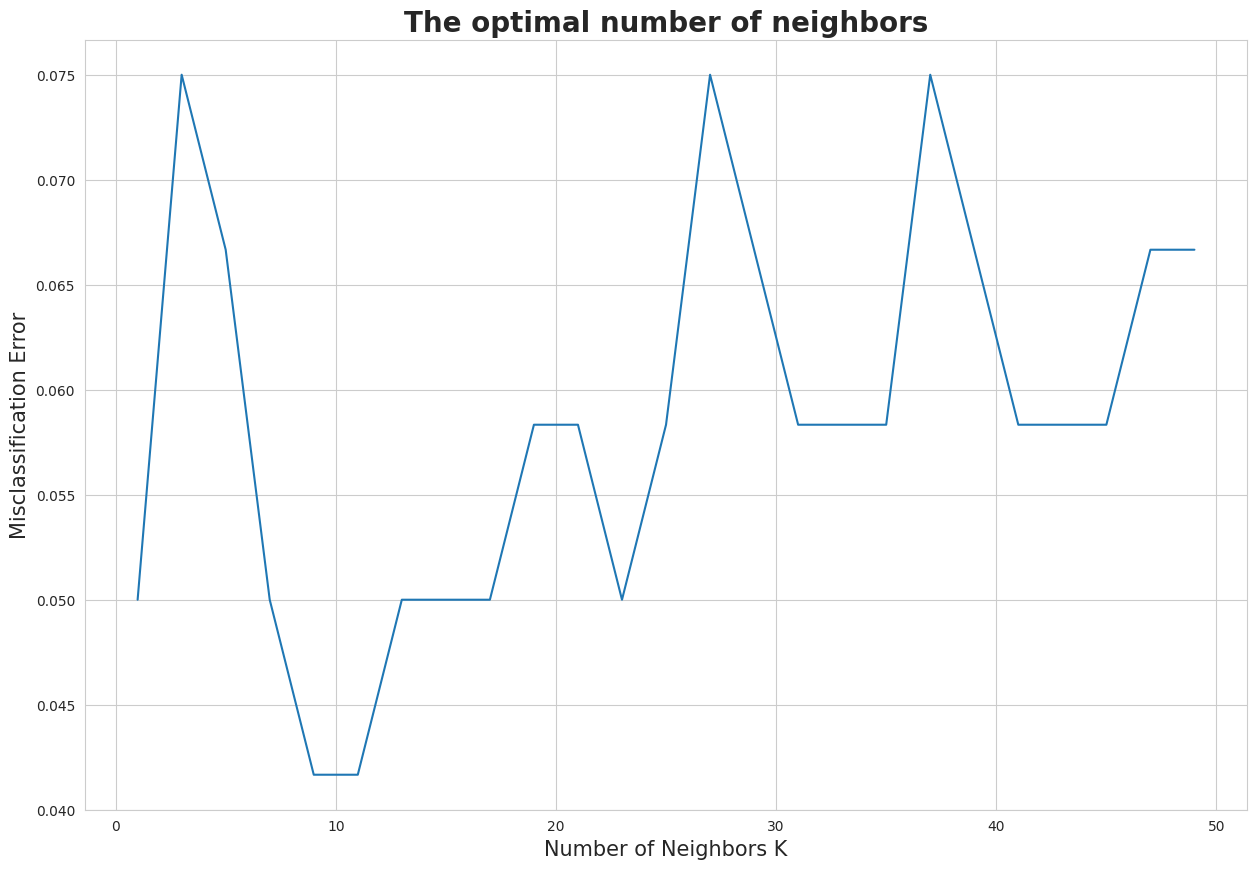

0.04166666666666674


In [39]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
print(MSE)
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

print(min(MSE))

In [36]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.
